### **Support Vector Regressor**

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

make_regression = https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

In [3]:
# Lets create synthetic data points
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
X

array([[ 0.82724242, -0.64125131],
       [ 0.01467228, -1.57243284],
       [ 0.07548858, -1.35788871],
       ...,
       [ 0.5013905 ,  0.29045174],
       [ 0.16277378, -0.27080658],
       [ 1.58829975,  1.18221648]])

In [5]:
y

array([ 9.39641181e+00, -1.01083338e+02, -7.67475566e+01,  2.12559552e+02,
        4.68276532e+01, -1.08838837e+02,  6.84384090e+01,  7.30775165e+01,
        1.90830492e+02, -6.40104763e+01, -2.14761962e+02, -5.70733652e+01,
       -2.42459601e+01,  1.98779036e+02,  1.20720362e+01,  2.51858217e+01,
       -5.44348169e-01,  9.69681322e+01,  1.64748985e+01,  4.55899748e+01,
        1.49993219e+02,  1.60236560e+02,  6.30396849e+01, -2.31773327e+02,
       -2.37251033e+01,  8.26637598e+01,  1.90311266e+01,  1.36754863e+02,
        4.25732856e+01, -1.21371765e+02, -9.17219241e+01, -1.58592009e+02,
       -6.44835523e+01, -4.97859588e+01, -4.22040205e+01,  2.13292736e+01,
        3.62370546e+01,  6.56015161e+01,  1.09564129e+02,  2.24349588e+01,
        2.75231863e+01, -7.81878710e+01, -9.92450425e+01,  6.70165757e+01,
       -1.04427215e+02, -4.88073375e+01, -9.15133199e+01,  1.31144969e+02,
       -2.70765710e+01, -4.48920011e+01,  1.05979390e+01, -1.70053618e+02,
       -3.91036197e+01, -

In [6]:
pd.DataFrame(X)[0]

0      0.827242
1      0.014672
2      0.075489
3      2.543615
4      1.165725
         ...   
995   -0.079899
996    1.148986
997    0.501391
998    0.162774
999    1.588300
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

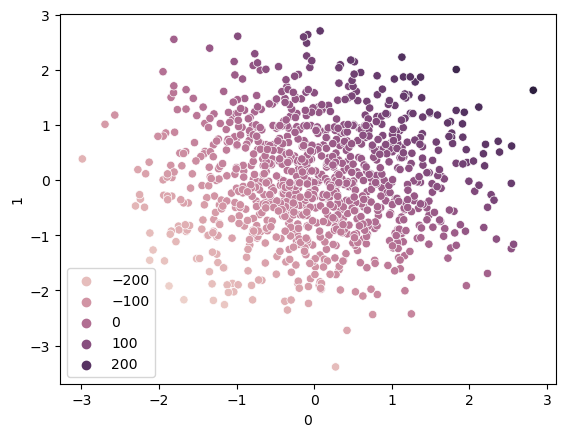

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

In [17]:
print(X_train.shape)
print(y_train.shape)

(750, 2)
(750,)


SVR = https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [11]:
# model
svr = SVR(kernel='linear')

In [18]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [19]:
svr.coef_

array([[65.94953798, 62.64500461]])

In [20]:
# prediction
y_pred = svr.predict(X_test)

In [21]:
y_pred

array([-9.50765777e+01,  9.78312043e-01,  1.19981318e+00,  8.86801930e+00,
       -5.95124914e+01,  8.43048606e+01, -9.79131610e+01,  2.24854833e+01,
       -5.35290244e+01,  1.89854045e+02,  4.11226376e+01,  8.07865835e+01,
       -1.11552511e+02,  2.05256378e+01,  1.14205149e+01,  3.36869599e+00,
        2.86407787e-01,  6.34989134e+01, -1.14004366e+00, -3.46663295e+01,
       -2.80307798e+01, -3.98079234e+01, -3.71173841e+01, -9.62972757e+00,
       -1.24143810e+02, -1.00097740e-01,  1.13479897e+02, -7.17993249e+01,
       -1.03154462e+02,  9.17430420e+01,  8.49468013e+01, -8.88719862e+01,
        2.65020903e+01,  4.96398207e+01, -6.82717864e+01,  1.29873222e+02,
       -1.11215769e+02,  9.24722253e+00, -3.43760524e+01, -6.90896731e+01,
       -1.45066153e+02, -1.01578812e+02, -7.96495154e+01,  1.19044029e+02,
       -5.69569447e+01,  9.20907660e+01, -2.25765611e+01,  1.71336983e+02,
        2.71459832e+01, -1.78662060e+01,  1.34690471e+02,  9.86005621e+01,
        3.87438224e+01, -

In [22]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9986745894208899


### **Hyperparametere Tuning With SVR**

In [23]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 100],
              'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1, 0.2, 0.3]}

In [25]:
grid = GridSearchCV(SVR(), param_grid, refit=True, cv=5, verbose=3)

In [26]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.790 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.754 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.790 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.754 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.773 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [28]:
# prediction
y_pred4 = grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9987317866980254
